In [68]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [13]:
# https://www.chmi.cz/historicka-data/pocasi/mesicni-data/mesicni-data-dle-z.-123-1998-Sb#
!iconv -f cp1250 -t utf-8 <B2BTUR01_T_N.csv >data.csv

In [14]:
!head -31 data.csv

#OPEN_EXPORT: 2023.05.05.1207
#Datum vytvoření souboru: 14.02.2024 18:58
#Stažením publikovaných dat souhlasíte s podmínkami užití těchto dat.

METADATA
Stanice ID;Jméno stanice;Začátek měření;Konec měření;Zeměpisná délka;Zeměpisná šířka;Nadmořská výška
B2BTUR01;Brno, Tuřany;01.01.1961;31.12.1996;16.6956;49.1597;241
B2BTUR01;Brno, Tuřany;01.01.1997;31.12.2023;16.688889;49.153056;241

PŘÍSTROJE
Přístroj;Začátek měření;Konec měření;Výška přístroje [m]
Teploměr;01.01.1961;31.12.1996;2
Teplotní čidlo;01.01.1997;31.10.2010;2
Teplotní čidlo;01.11.2010;31.12.2023;2.03

PRVEK
Průměrná denní teplota vzduchu [T.AVG, °C]

POPIS
Hodnota - měsíční hodnota prvku pro daný měsíc
Datum - datum výskytu hodnoty
Příznak * u datumu znamená, že se hodnota vyskytla vícekrát
Příznak I znamená, že se výpočet provedl z neúplných dat.

STATISTIKA
AVG - průměrná hodnota za měsíc
SUM - součet za měsíc
MAX - maximální hodnota za měsíc a den maxima
MIN - minimální hodnota za měsíc a den minima

MĚSÍČNÍ DATA


In [31]:
data = pd.read_csv('data.csv',sep=';',skiprows=31)

In [94]:
unor = data[(data['Rok'] < 2000) & (data['Statistika']=='AVG')]['Hodnota únor']

In [95]:
unor.mean(),unor.std()

(-0.18461538461538463, 2.7595326131276257)

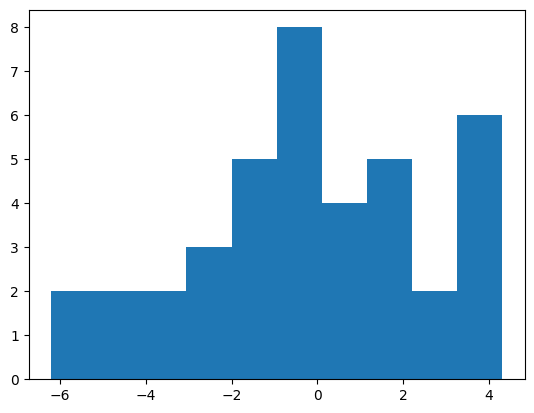

In [96]:
plt.hist(unor.to_numpy())
plt.show()

In [97]:
scipy.stats.normaltest(unor)

NormaltestResult(statistic=0.8616974209256129, pvalue=0.6499572350661325)

In [100]:
unor2024=5.7
1-scipy.stats.norm.cdf(unor2024,unor.mean(),unor.std())

0.016484190379218666